In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Amazon Sales data.csv')

print("Data Preview:")
# Display the first few rows of the dataframe
print(df.head())


Data Preview:
                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Tota

In [15]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None


In [16]:
# Data Cleaning and Transformation
# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [7]:
print(df.isnull().sum())

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [8]:
# Assuming there are no missing values, if there are, we can handle them
# Example: Fill missing values with median for numerical columns and mode for categorical columns
# df['column_name'].fillna(df['column_name'].median(), inplace=True)
# df['categorical_column'].fillna(df['categorical_column'].mode()[0], inplace=True)

# Ensure correct data types
print(df.dtypes)


Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object


In [18]:
# Extract year and month from 'Order Date'
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Year-Month'] = df['Order Date'].dt.to_period('M')
# Sales trend analysis
# Monthly sales trend
monthly_sales = df.groupby('Order Year-Month')['Total Revenue'].sum().reset_index()

# Yearly sales trend
yearly_sales = df.groupby('Order Year')['Total Revenue'].sum().reset_index()

# Yearly monthly sales trend
yearly_monthly_sales = df.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().unstack().fillna(0)


In [10]:
# Initial Data Analysis
# Descriptive statistics
print(df.describe())

                Order Date      Order ID            Ship Date   Units Sold  \
count                  100  1.000000e+02                  100   100.000000   
mean   2013-09-16 14:09:36  5.550204e+08  2013-10-09 22:48:00  5128.710000   
min    2010-02-02 00:00:00  1.146066e+08  2010-02-25 00:00:00   124.000000   
25%    2012-02-14 12:00:00  3.389225e+08  2012-02-24 18:00:00  2836.250000   
50%    2013-07-12 12:00:00  5.577086e+08  2013-08-11 12:00:00  5382.500000   
75%    2015-04-07 00:00:00  7.907551e+08  2015-04-28 00:00:00  7369.000000   
max    2017-05-22 00:00:00  9.940222e+08  2017-06-17 00:00:00  9925.000000   
std                    NaN  2.606153e+08                  NaN  2794.484562   

       Unit Price   Unit Cost  Total Revenue    Total Cost  Total Profit  \
count  100.000000  100.000000   1.000000e+02  1.000000e+02  1.000000e+02   
mean   276.761300  191.048000   1.373488e+06  9.318057e+05  4.416820e+05   
min      9.330000    6.920000   4.870260e+03  3.612240e+03  1.258020e

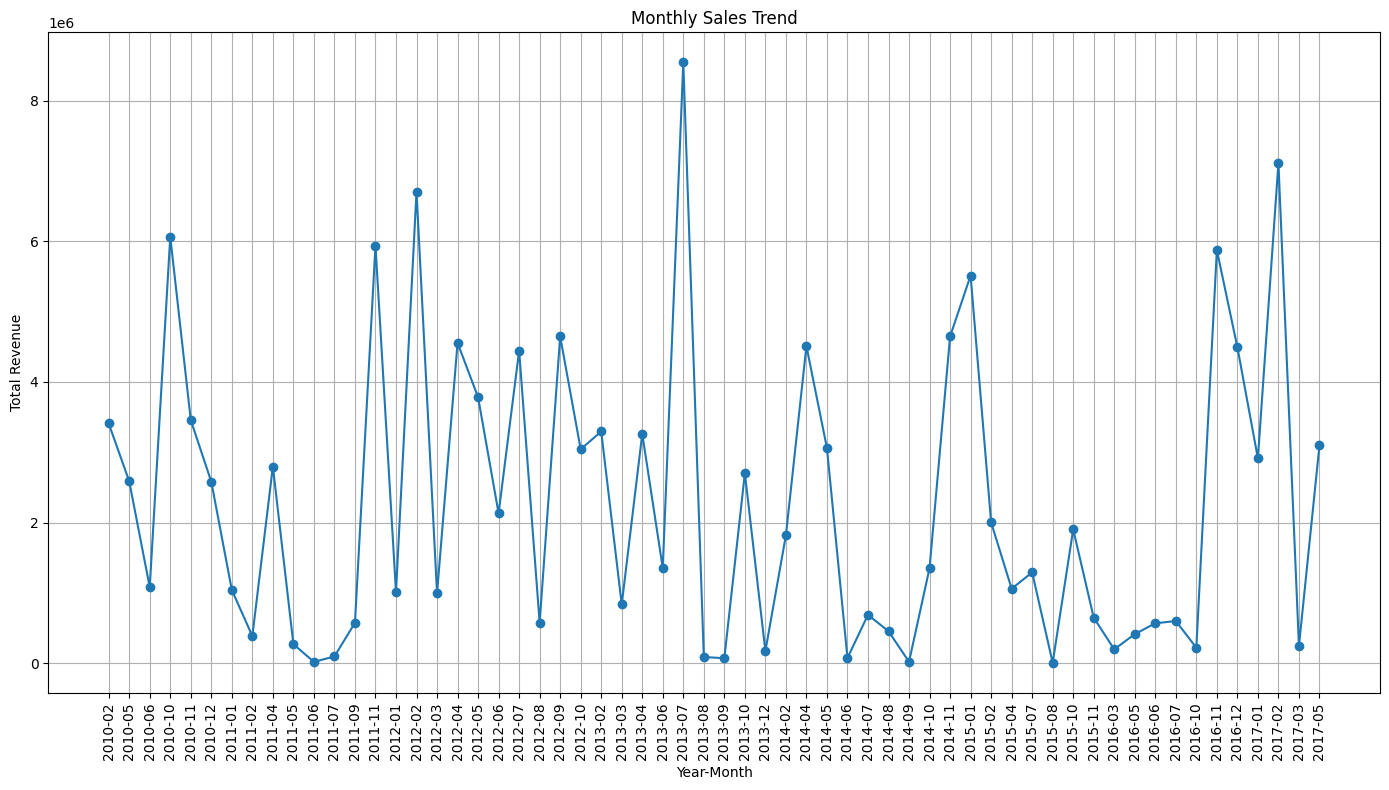

In [19]:
# Visualize the sales trends
plt.figure(figsize=(14, 8))
plt.plot(monthly_sales['Order Year-Month'].astype(str), monthly_sales['Total Revenue'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.tight_layout()
plt.show()

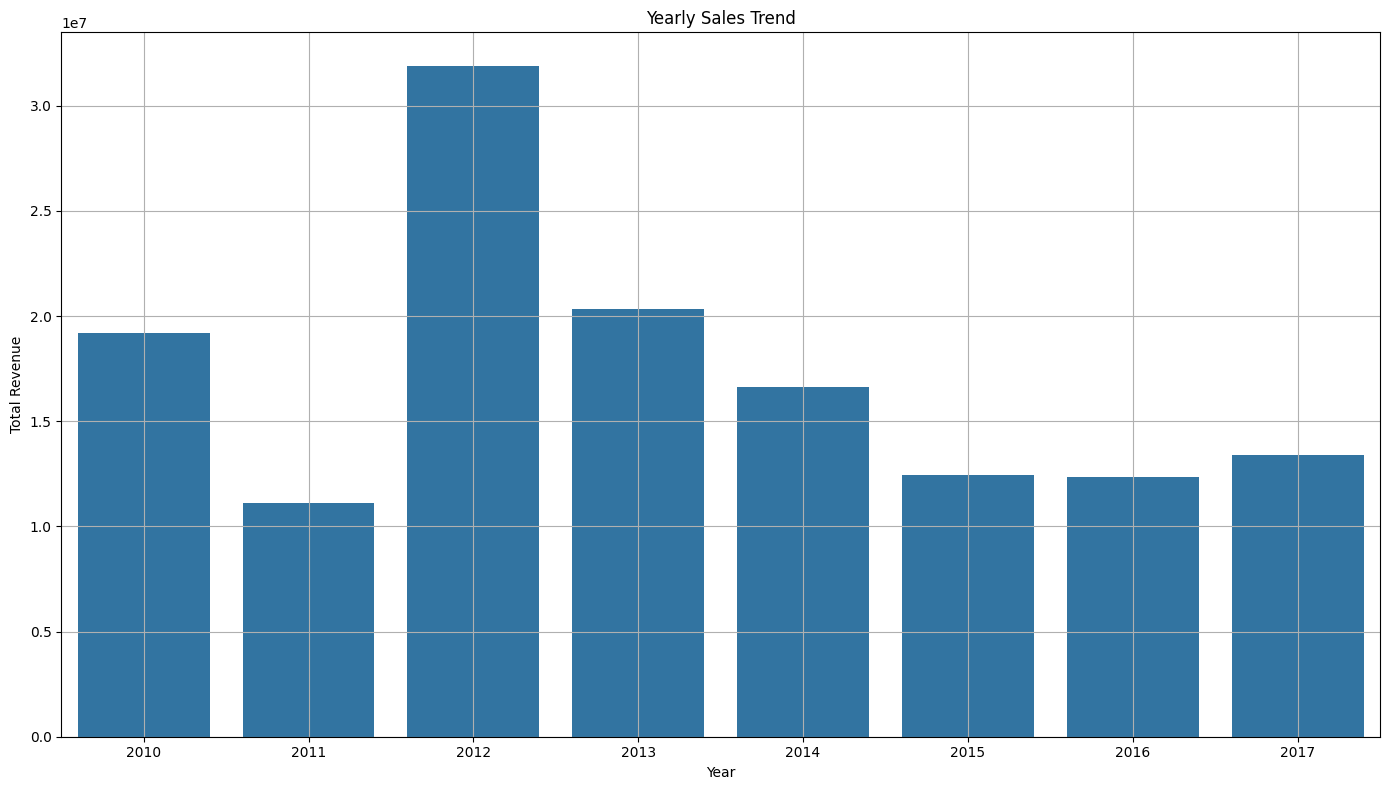

In [20]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Order Year', y='Total Revenue', data=yearly_sales)
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Yearly Sales Trend')
plt.grid(True)
plt.tight_layout()
plt.show()

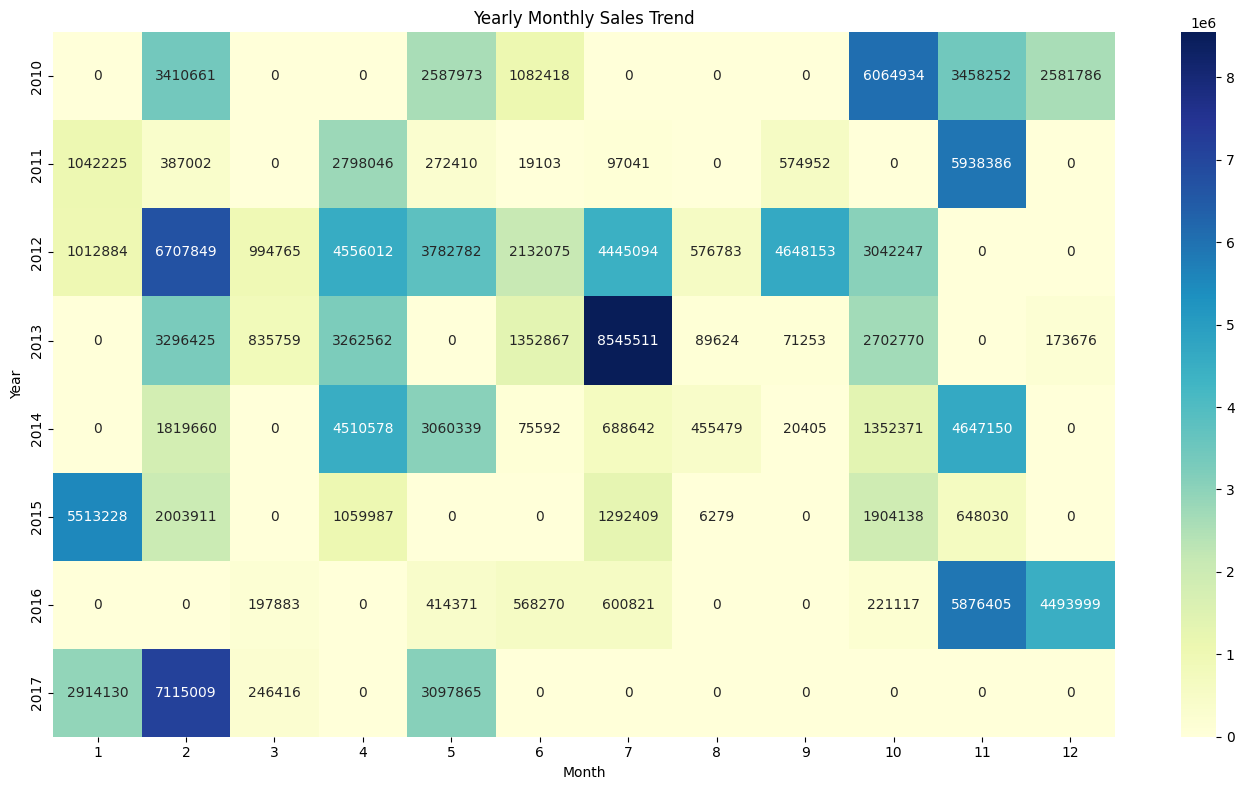

In [21]:
plt.figure(figsize=(14, 8))
sns.heatmap(yearly_monthly_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Yearly Monthly Sales Trend')
plt.tight_layout()
plt.show()

In [22]:
# Key metrics and factors
# Total units sold
total_units_sold = df['Units Sold'].sum()

# Average unit price
average_unit_price = df['Unit Price'].mean()

# Total revenue
total_revenue = df['Total Revenue'].sum()

# Total cost
total_cost = df['Total Cost'].sum()

# Total profit
total_profit = df['Total Profit'].sum()

In [23]:
# Metrics summary
metrics_summary = {
    'Total Units Sold': total_units_sold,
    'Average Unit Price': average_unit_price,
    'Total Revenue': total_revenue,
    'Total Cost': total_cost,
    'Total Profit': total_profit
}

print("Key Metrics Summary:")
for key, value in metrics_summary.items():
    print(f"{key}: {value}")

Key Metrics Summary:
Total Units Sold: 512871
Average Unit Price: 276.7613
Total Revenue: 137348768.31
Total Cost: 93180569.91000001
Total Profit: 44168198.39999999


In [24]:
# Save the transformed dataset
df.to_csv('transformed_amazon_sales_data.csv', index=False)

# Save the key metrics summary
metrics_df = pd.DataFrame(list(metrics_summary.items()), columns=['Metric', 'Value'])
metrics_df.to_csv('key_metrics_summary.csv', index=False)

In [25]:
transformed_df = pd.read_csv('transformed_amazon_sales_data.csv')

# Display the first few rows of the transformed dataset
print(transformed_df.head())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority  Order Date   Order ID   Ship Date  Units Sold  \
0       Offline              H  2010-05-28  669165933  2010-06-27        9925   
1        Online              C  2012-08-22  963881480  2012-09-15        2804   
2       Offline              L  2014-05-02  341417157  2014-05-08        1779   
3        Online              C  2014-06-20  514321792  2014-07-05        8102   
4       Offline              L  2013-02-01  115456712  2013-02-06        5062   

   Unit Price  Unit Cost  Total 

In [26]:
key_metrics_df = pd.read_csv('key_metrics_summary.csv')

# Display the key metrics summary
print(key_metrics_df)

               Metric         Value
0    Total Units Sold  5.128710e+05
1  Average Unit Price  2.767613e+02
2       Total Revenue  1.373488e+08
3          Total Cost  9.318057e+07
4        Total Profit  4.416820e+07
